# $\color{blue}{\text{NLP tasks in GIS and information extraction from text}}$  

* prof. dr Ranka Stanković, University of Belgrade, Faculty of Mining and Geology, ranka@rgf.rs

* PhD  winter class : Big data and artificial intelligence supporting climate and water science, Earth and Life Institute of UCLouvain, Louvain-la-Neuve, 27.1.2025. 9h-10:30h https://sites.google.com/view/envitam/upcoming-events/big-data-and-water-management  


## NER & NEL: (Geo-)Entities Linking with Knowledge bases (Wikidata)

Some examples are inspired from other resources, NLP Workshop prepared by Benedict Perak:
* [NER Processing using NLP tools (spaCy)](https://colab.research.google.com/drive/16J6-X3jvGMW57JohC40cB76gP8ms0AnB?usp=sharing)

* [Distant reading_NER_GooGleMaps_geo_data](https://colab.research.google.com/drive/1umGiTylqwvvVWnm_g9MrLSf1xJtemBDf?usp=sharing)

* [Data Analysis, Representation of the Geo-Entities and Enrichment of the Data Using Wikipedia](https://colab.research.google.com/drive/1Hs6kxf2x_o8A-1j2SXJHGM6lIeIxpbMr?usp=sharing)



# Resources


## Intro slides
*  

## ELEXSIS-wsd
* Unidive COST action Task 2.2 links


## Colab Jupyter Notebooks of previous workshops
* [Mapping Geo Data with Wikipedia](https://colab.research.google.com/drive/1Hs6kxf2x_o8A-1j2SXJHGM6lIeIxpbMr?authuser=1#scrollTo=86lvw0RYtXx6)
* [NER Processing using NLP tools (spaCy)](https://colab.research.google.com/drive/16J6-X3jvGMW57JohC40cB76gP8ms0AnB?usp=sharing)
* [Data Analysis, Representation of the Geo-Entities and Enrichment of the Data Using Wikipedia](https://colab.research.google.com/drive/1BgZBBXVX6gOU5qn8k3wuUy4Z0rqnM--V?usp=sharing)

* [Belgrade Training School: “Exploring ELTeC: Use-Cases for Information Extraction and Analysis”](https://jerteh.rs/index.php/en/belgrade-training-school-exploring-eltec-use-cases-for-information-extraction-and-analysis/)

## Python code and data analysis resources

Shared OneDrive folder:
* https://uniri-my.sharepoint.com/:f:/g/personal/bperak_uniri_hr/Es9uqLbatzVBipWEWbu2ESEB_MXEhjbImQIdsI83zy4raQ?e=Thju2k

## IDE tools
* https://colab.research.google.com/
* https://code.visualstudio.com/ , ....

## Language NLP resources
* Spacy https://spacy.io/ for (Catalan, Chinese, Danish, Dutch, English, French, German, Greek, Italian, Japanese, Lithuanian, Macedonian, Norwegian Bokmål, Polish, Portuguese, Romanian, Russian, Spanish)

## Data processing libraries
* Pandas https://pandas.pydata.org/
* igraph https://igraph.org/python/
* Plotly https://plotly.github.io/plotly.py-docs/index.html#
* Time module https://docs.python.org/3/library/time.html

### NER Workshop
* https://github.com/distantreading/WG2/tree/master/NER_TS
* https://github.com/distantreading/WG2/tree/master/NER_TS/TXT_samples
* https://github.com/distantreading/WG2/tree/master/NER_TS/novels




### Installation of libraries used to process the data.

In [ ]:
#!pip install basemap
#!pip install geopy

In [ ]:
import geopy
from geopy.geocoders import Nominatim

import folium
import time
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Importing text from github repository

For the purposes of this session, the texts from the ELEXSIS-wsd corpus will be used for two languages: Serbian and English.

Text files are avaliable at github repository
* https://github.com/rankastankovic/NLP4GIS


## Importing texts from repository

Function `get_git_text()` takes language as argument and fetches the files from a designated folder on github repository.


In [ ]:
import requests

def get_git_text(lang):
    if lang == 'sr':
        # URL for the Serbian file
        file_url = f"https://raw.githubusercontent.com/rankastankovic/NLP4GIS/refs/heads/main/data/sr-elexsis-95-146.txt"
    else:
        # URL for the English file
        file_url = f"https://raw.githubusercontent.com/rankastankovic/NLP4GIS/refs/heads/main/data/en-elexsis-95-146.txt"

    try:
        # Downloading the file content
        response = requests.get(file_url)
        response.raise_for_status()  # Check if the request was successful
        return response.text
    except requests.exceptions.RequestException as e:
        # Handle any request exceptions
        return f"Error fetching file: {e}"

# Example usage
language = 'en'  # Or 'sr'
file_content = get_git_text(language)
print(file_content)


At the end of the Forum, the participants followed the tradition of attending the UEFA Champions League Final.
In Moscow, with the support of the Sports Federation of the Blind, an Equal Opportunity Tournament was organized.
Cervantes' influence on the Spanish language has been so great that the language is often called la lengua de Cervantes ("the language of Cervantes").
This is what the great founder of our state, Vladimir Lenin, taught us.
It shares a border with every South American country except Ecuador and Chile.
Yes, Samantha, we in the Soviet Union are trying to do everything so that there will not be war on Earth.
Euler's identity is named after the Swiss mathematician Leonhard Euler.
Pavia fell after a siege of three years, in 572, becoming the first capital city of the new Lombard kingdom of Italy.
Apollo 12 was the sixth manned flight in the United States Apollo program and the second to land on the Moon.
Order of the British Empire, founded by King George V of the United

# Corpus creation by using NLP pipelines
Digitally tagged corpuses are produced using NLP algorithms based on machine learning algorithms. The method is to build a pipeline of several sequential processing components and add information layer, ie. tagg,  on a sequence of characters, ie. text.

The idea is to break up text analysis problems into very small pieces and then use machine learning to solve each smaller task separately. Then, by chaining together several machine learning models that feed into each other, you can do very complicated things. (See more: [Suneel Patel](https://medium.com/@suneelpatel.in/nlp-pipeline-building-an-nlp-pipeline-step-by-step-7f0576e11d08))

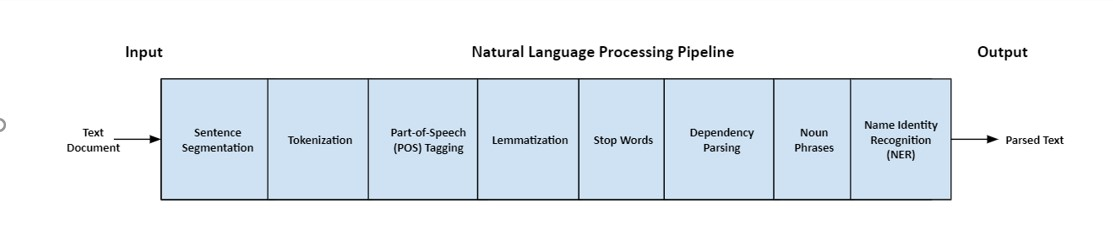

## NLP tasks
1. **Information retrieval**.
Finds documents of text that satisfies an information need from within large collections
2. **Named entity recognition**.
Seeks to locate and classify entities into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.
3. **Relation extraction**.
Extracts semantic relationships from the text, which usually occur between two or more entities
4. **Text classification/Document Classification**.
Assigns a text/document to one or more classes or categories.
5. **Document Ranking**
6. **Annotation**
7. **Topic modelling**
Discovers the abstract “topics” that occur in a collection of documents
8. **Keyword Extraction**
9. **Machine translation**
10. **Parts of speech tagging**.
Process of marking up a word in a text as corresponding to a particular part of speech
11. **Semantic Role Labeling**.
Indicates the semantic role in the sentence, such as that of an agent, goal, or result
12. **Word Sense Disambiguation**.
Identifies which sense of a word is used in a sentence
13. **Grammatical Error Correction**
14. **Semantic textual similarity**.
determines how similar two pieces of texts are. This can take the form of assigning a score from 1 to 5. Related tasks are paraphrase or duplicate identification.
15. **Text summarization/Meeting Summarization**
16. **Reading comprehension**
17. **Question and answering**
18. **Question Generation**
19. **Image captioning**
20. **Fake News Detection/Hate Speech Detection**
21. **Text generation**
22. **Sentiment/emotion analysis**.
Interprets and classifies of emotions (positive, negative and neutral) with text data
23. **Speech-to-text**.
Translation of spoken language into text
24. **Text-to-speech**.
Converts text into spoken voice output
25. **Dialogue Understanding**

More about  [State of the art (SOTA) NLP tasks](https://paperswithcode.com/area/natural-language-processing), [Medium article by Jayathilaka](https://medium.com/@miranthaj/25-nlp-tasks-at-a-glance-52e3fdff32e2),

### Spacy https://spacy.io/ procedure
* install SpaCy
* import Spacy,
* load language model,
* store the output of a nlp pipeline in a `doc` object,
* parse the tokens of a doc object

In [ ]:
# install the latest (upgraded) (-U) version of spaCy
!pip install -U spacy
import spacy
# importing package for visualization
from spacy import displacy


  Using cached spacy-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached thinc-8.3.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached blis-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
Using cached spacy-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.6 MB)
Using cached thinc-8.3.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.9 MB)
Using cached blis-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Succe

In [ ]:
!python -m spacy info

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'sr_pln_tesla_j355' (1.0.0) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)

============================== Info about spaCy ==============================

spaCy version    3.8.4                

## spaCy Language Processing Pipeline
When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

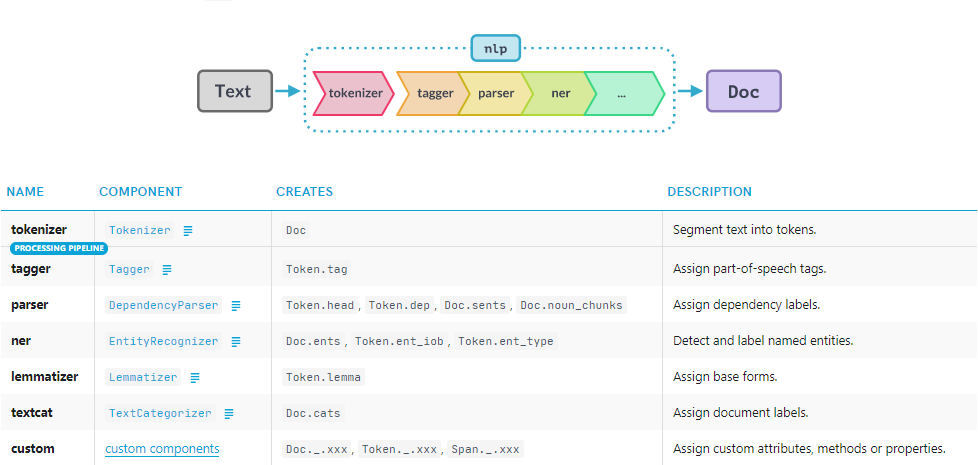

## Doc object
`Doc` object is a sequence of `Token` objects. Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings. The Doc object holds an array of TokenC structs. The Python-level Token and Span objects are views of this array, i.e. they don’t own the data themselves.

* https://spacy.io/api/doc



# Named Entities with spaCy
* https://spacy.io/usage/linguistic-features#named-entities

spaCy features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens. The default trained pipelines can indentify a variety of named and numeric entities, including **companies, locations, organizations** and **products**. You can add arbitrary classes to the entity recognition system, and update the model with new examples.

**Jerteh-355-tesla** is LMM for Serbian, that is developed under umbrella of TESLA project, as model for NER witch recognized seven class of entities **persons, locations, organizations,events,work of art, demonyms, roles**

**SrpCNNEL** is LMM for Named Entity Linking task for Serbian.The model is primarily trained to recognize and link **locations**.

If you use this models please cite as:

* Ikonić Nešić, M., Petalinkar, S., Škorić, M., & Stanković, R. (2024, March). BERT Downstream Task Analysis: Named Entity Recognition in Serbian. In Conference on Information Technology and its Applications (pp. 333-347). Cham: Springer Nature Switzerland.
* Ikonić Nešić, M., Petalinkar, S., Stanković, R., Utvić, M., & Kitanović, O. (2024, September). SrpCNNeL: Serbian Model for Named Entity Linking. In 2024 19th Conference on Computer Science and Intelligence Systems (FedCSIS) (pp. 465-473). IEEE.  



### Importing Spacy nlp models

spaCy’s trained language models (pipelines) can be installed as Python packages. This means that they’re a component of your application, just like any other module. They’re versioned and can be defined as a dependency in your requirements.txt. Trained pipelines can be installed from a download URL or a local directory, manually or via pip. Their data can be located anywhere on your file system.

* https://spacy.io/usage/models


In [ ]:
# download the language model for English
#!python -m spacy download en_core_web_sm
# activate language model pipeline
nlp_en = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
# download LMM for Serbian
# import from HF model for named entity recognition -> jerteh-355-tesla
!wget https://huggingface.co/Tanor/sr_pln_tesla_j355/resolve/main/sr_pln_tesla_j355-any-py3-none-any.whl -O sr_pln_tesla_j355-0.1-py3-none-any.whl
!pip install sr_pln_tesla_j355-0.1-py3-none-any.whl

In [ ]:
# nlp object for Serbian
nlp_sr = spacy.load("sr_pln_tesla_j355")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'sr_pln_tesla_j355' (1.0.0) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_n

In [ ]:
# example of the use
example_text= "Apple is looking at buying U.K. startup for $1 billion"
print('Parsing the entities in text:\n', example_text)
doc = nlp_en(example_text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Parsing the entities in text:
 Apple is looking at buying U.K. startup for $1 billion
Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [ ]:
# example of the use of Serbian model
example_text= "Danas profesor Ranka Stanković drži predavanje u Belgiji."
print('Parsing the entities in text:\n', example_text)
doc = nlp_sr(example_text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Parsing the entities in text:
 Danas profesor Ranka Stanković drži predavanje u Belgiji.
profesor 6 14 ROLE
Ranka Stanković 15 30 PERS
Belgiji 49 56 LOC


# Create a dictionary with NLP parsed token features of a doc object

In [ ]:
# For each token in the doc object present lemma, iob , type (NE class)
def create_nlp_dic(lng,text):
  if lng == "sr":
    doc = nlp_sr(text)
  else:
    doc = nlp_en(text)
  doc_dict = []
  for t in doc:
    entity = {"token": t.text, "lemma": t.lemma_, "ent._iob_": t.ent_iob_,  "ent._type_": t.ent_type_}
    doc_dict.append(entity)
  return doc_dict


In [ ]:
# example of use for Serbijan
example_text_sr= "Danas profesor Ranka Stanković drži predavanje u Belgiji."
example_text_en="Today, Professor Ranka Stanković is giving a lecture in Belgium."
lng = "sr" # or "en"
example_text_variable = globals()[f"example_text_{lng}"]

doc_dict = create_nlp_dic(lng, example_text_variable)

doc_dict

[{'token': 'Danas', 'lemma': 'danas', 'ent._iob_': 'O', 'ent._type_': ''},
 {'token': 'profesor',
  'lemma': 'profesor',
  'ent._iob_': 'B',
  'ent._type_': 'ROLE'},
 {'token': 'Ranka', 'lemma': 'Ranka', 'ent._iob_': 'B', 'ent._type_': 'PERS'},
 {'token': 'Stanković',
  'lemma': 'Stanković',
  'ent._iob_': 'I',
  'ent._type_': 'PERS'},
 {'token': 'drži', 'lemma': 'držati', 'ent._iob_': 'O', 'ent._type_': ''},
 {'token': 'predavanje',
  'lemma': 'predavanje',
  'ent._iob_': 'O',
  'ent._type_': ''},
 {'token': 'u', 'lemma': 'u', 'ent._iob_': 'O', 'ent._type_': ''},
 {'token': 'Belgiji',
  'lemma': 'Belgija',
  'ent._iob_': 'B',
  'ent._type_': 'LOC'},
 {'token': '.', 'lemma': '.', 'ent._iob_': 'O', 'ent._type_': ''}]

## DataFrame representation of the parsed document
DataFrame is a convenient type of representing and manipulating data.
* https://pandas.pydata.org
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [ ]:
# Example of creating df from dictionary
df_doc = pd.DataFrame().from_dict(doc_dict)
df_doc

,token,lemma,ent._iob_,ent._type_
0,Danas,danas,O,
1,profesor,profesor,B,ROLE
2,Ranka,Ranka,B,PERS
3,Stanković,Stanković,I,PERS
4,drži,držati,O,
5,predavanje,predavanje,O,
6,u,u,O,
7,Belgiji,Belgija,B,LOC
8,.,.,O,


In [ ]:
# Function creating df from dictionary for specific language and text
# Represents tokens,  lemma for each token and type (NE class) in iob format
def get_docs_token_tags_df(lng, text):
        # create dictionary
        doc_dict = create_nlp_dic(lng, text)
        # create df
        df_doc = pd.DataFrame().from_dict(doc_dict)
        return df_doc

In [ ]:
# Example on text from github for Serbian
df_doc_sr = get_docs_token_tags_df("sr", get_git_text("sr"))
df_doc_sr

,token,lemma,ent._iob_,ent._type_
0,Na,na,O,
1,kraju,kraj,O,
2,Foruma,Foruma,B,ORG
3,učesnici,učesnik,O,
4,su,jesam,O,
...,...,...,...,...
862,će,hteti,O,
863,doneti,doneti,O,
864,slavu,slava,O,
865,naciji,nacija,O,


In [ ]:
# Create data frame only for named entities
# Columns present named entity, type (NE class) and lemma
def get_docs_entity_tags_df(lng, text):
    if lng == "sr":
      doc = nlp_sr(text)
    else:
      doc = nlp_en(text)
    df_docs= pd.DataFrame()
    doc_dict = []
    for entity in doc.ents:
        entity_tags = {"entity": entity.text, "type": entity.label_, 'lemma': entity.lemma_}
        doc_dict.append(entity_tags)
    df_docs = pd.DataFrame().from_dict(doc_dict)
 #   df_docs = pd.concat([df_docs,df_doc])
    return df_docs
entities_df = get_docs_entity_tags_df("sr", get_git_text("sr"))
entities_df

,entity,type,lemma
0,Foruma,ORG,Foruma
1,UEFA,ORG,UEFA
2,Lige šampiona,EVENT,liga šampion
3,Moskvi,LOC,Moskva
4,"Sportskog saveza slepih,",ORG,"sportski savez slep,"
...,...,...,...
86,Biblioteci Zamojski,ORG,Biblioteca Zamojski
87,britanske,DEMO,britanski
88,Ksantip,PERS,Ksantip
89,Nemačke,LOC,Nemačka


# Descriptive statistics on Named Entities

In [ ]:
# Recognized class of NE
entities_df_unique = entities_df['type'].unique()
entities_df_unique

array(['ORG', 'EVENT', 'LOC', 'DEMO', 'PERS', 'ROLE', 'WORK'],
      dtype=object)

In [ ]:
# Statistics of NEs
entities_df.groupby('type').count()[1:]['entity'].sort_values(ascending=False)

,entity
type,
LOC,28
PERS,15
ROLE,15
ORG,12
EVENT,2
WORK,2


<Axes: ylabel='type'>

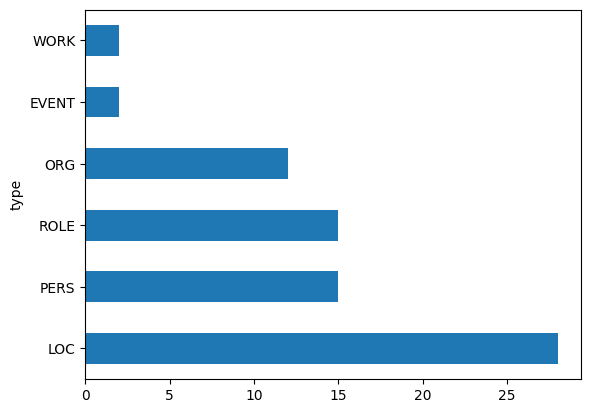

In [ ]:
# Visualise the Entities as horizontal barplot
entities_df.groupby('type').count()[1:]['entity'].sort_values(ascending=False).plot.barh()

In [ ]:
# Percentage of the Entity types in overall Entites
ent_types = entities_df.groupby('type').count()['entity']
(ent_types/ent_types[1:].sum()*100).sort_values(ascending=False)

,entity
type,
LOC,37.837838
DEMO,22.972973
PERS,20.270270
ROLE,20.270270
ORG,16.216216
EVENT,2.702703
WORK,2.702703


<Axes: ylabel='entity'>

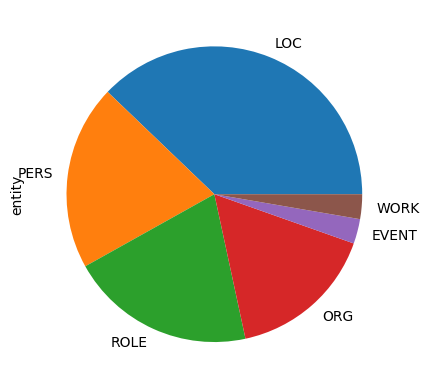

In [ ]:
entities_df.groupby('type').count()[1:]['entity'].sort_values(ascending=False).plot.pie()

In [ ]:
#@title Representation of a type of Entities in Serbian
# for other languages see NEs classes
dropdown = 'PERS' #@param ['PERS', 'ORG', 'LOC', 'WORK', 'DEMO', 'EVENT','ROLE']
print(dropdown)

entity_type= dropdown
print(entities_df[entities_df['type']== entity_type]['entity'].unique())

PERS
['Vladimir Lenjin' 'Leonardu Ojleru' 'Džordž V.\r\n' 'Antoniju Fokeru'
 'Grinbergu' 'Alberta Ajnštajna' 'Grabovski' 'Adolfa Hitlera'
 'Andree Paladija' 'Šarlu de Golu' 'Hejerdal' 'Posejdonu' 'Ersted'
 'Ksantip' 'Hitlerom']


## Represent the NE using displaCy
Using the `displacy.render` method we can visualize the Named Entities.

* https://spacy.io/usage/visualizers

In [ ]:
from spacy import displacy

In [ ]:
# Function for HTML visuelization of NE in text for specific language
def make_visualization(lng, text):
  if lng == "sr":
    doc = nlp_sr(text)
  else:
    doc = nlp_en(text)
  # making own options for coloring entities in HTML
  options = {
      'colors': {
          'DEMO': 'linear-gradient(90deg, #FFB6C1, #FFC0CB)',   # Light pink shades
          'EVENT': 'linear-gradient(90deg, #ADD8E6, #87CEFA)',  # Light blue shades
          'LOC': 'linear-gradient(90deg, #98FB98, #90EE90)',    # Light green shades
          'ORG': 'linear-gradient(90deg, #FFD700, #FFA500)',    # Gold to orange
          'PERS': 'linear-gradient(90deg, #EE82EE, #DA70D6)',   # Violet shades
          'ROLE': 'linear-gradient(90deg, #D3D3D3, #A9A9A9)',   # Grey shades
          'WORK': 'linear-gradient(90deg, #F0E68C, #FFDAB9)',   # Khaki to peach
      }
  }

  return displacy.render(doc, style='ent', jupyter=True, options=options)

In [ ]:
make_visualization("sr", get_git_text("sr"))

In [ ]:
make_visualization("en", get_git_text("en"))

Another possibility deplacy
* https://colab.research.google.com/drive/1CK01R9ThvMIjxJcWu2gc8th3g0sAcxuS?usp=sharing

# GeoMapping data


## Locating the geo entities using Nominatim package


In [ ]:
# Show only entities that are LOC
entities_df[entities_df['type'].isin(['LOC'])]

,entity,type,lemma
3,Moskvi,LOC,Moskva
9,Ekvadorom,LOC,Ekvador
10,Čileom,LOC,Čile
11,Samanta,LOC,Samanta
12,Sovjetskom Savezu,LOC,Sovjetskom savez
13,Zemlji,LOC,zemlja
17,Pavija,LOC,Pavija
19,Italije,LOC,Italija
20,Misija Apolo 12,LOC,Misija Apolo @card@
22,Sjedinjenih Država,LOC,sjedinjen Država


In [ ]:
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

# entering the location name
getLoc = loc.geocode("Lisboa")

# printing address
print(getLoc.address)

# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n") #north-south
print("Longitude = ", getLoc.longitude) # east-west

Lisboa, Portugal
Latitude =  38.7077507 

Longitude =  -9.1365919


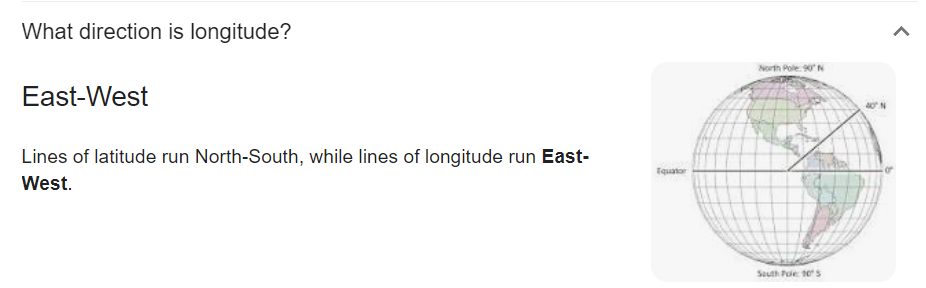

In [ ]:
# function uses other function get_docs_entity_tags_df(lng, text) which generates data frame from text
# df has entity, label, lemma

def locations_in_text(lng, text):
  entities_df= get_docs_entity_tags_df(lng, text)
  locations = entities_df[entities_df['type'].isin(['GPE', 'LOC'])]['lemma'].unique().tolist()
  return locations

In [ ]:
# Initialize geocaching dictionary
geocache = {}

# Function to get location with caching
def getLocation(entity_unique):
    global geocache
    # Check if location is already in the cache
    if entity_unique not in geocache:
        print(f"Geocoding {entity_unique}...")
        geolocator = Nominatim(timeout=10, user_agent="GeoLoc")
        getLoc = geolocator.geocode(entity_unique)
        if getLoc:
            geocache[entity_unique] = {'lat': getLoc.latitude, 'long': getLoc.longitude}
        else:
            print(f"Could not geocode {entity_unique}")
            geocache[entity_unique] = {'lat': None, 'long': None}
    return {'entity': entity_unique, 'lat': geocache[entity_unique]["lat"], 'long': geocache[entity_unique]["long"]}


In [ ]:
# get coordinates for locations extracted from text
# in form  of list tuples , for example (55.625578, 37.6063916, 'Moskva')
def coordinates_of_locations_in_text(lng,text):
  coordinates = []
  locations = locations_in_text(lng, text)


  for loc in locations:
      time.sleep(1)  # Pause to avoid overloading the API
      location_data = getLocation(loc)
      if location_data['lat'] is not None and location_data['long'] is not None:
          coordinates.append((location_data['lat'], location_data['long'], loc))


  # 7. Check if we got valid coordinates
  if not coordinates:
      print("No valid coordinates found. Exiting.")
  else:
      print(f"Valid coordinates found: {coordinates}")
  return coordinates

In [ ]:
coordinates_of_locations_in_text("sr", get_git_text("sr"))

Geocoding Moskva...
Geocoding Ekvador...
Geocoding Čile...
Geocoding Samanta...
Geocoding Sovjetskom savez...
Could not geocode Sovjetskom savez
Geocoding zemlja...
Geocoding Pavija...
Geocoding Italija...
Geocoding Misija Apolo @card@...
Could not geocode Misija Apolo @card@
Geocoding sjedinjen Država...
Could not geocode sjedinjen Država
Geocoding mesec...
Geocoding Firenca...
Geocoding Danska...
Geocoding Švedska...
Geocoding Jerusalim...
Geocoding Izrael...
Geocoding Rim...
Geocoding jezero Kjoga...
Could not geocode jezero Kjoga
Geocoding Velikih jezero...
Could not geocode Velikih jezero
Geocoding Varšava...
Geocoding Anafilaksa...
Could not geocode Anafilaksa
Geocoding Kanari...
Geocoding Amerika...
Geocoding Mediteran...
Geocoding Mesec...
Geocoding Belgija...
Geocoding Norveška...
Geocoding Nemačka...
Valid coordinates found: [(55.625578, 37.6063916, 'Moskva'), (-1.3397668, -79.3666965, 'Ekvador'), (-31.7613365, -71.3187697, 'Čile'), (49.3047327, 19.9590038, 'Samanta'), (47.65

[(55.625578, 37.6063916, 'Moskva'),
 (-1.3397668, -79.3666965, 'Ekvador'),
 (-31.7613365, -71.3187697, 'Čile'),
 (49.3047327, 19.9590038, 'Samanta'),
 (47.6594864, -0.8186143, 'zemlja'),
 (42.912473, 17.103481117067894, 'Pavija'),
 (42.6384261, 12.674297, 'Italija'),
 (50.8813013, 14.3622235, 'mesec'),
 (43.7697955, 11.2556404, 'Firenca'),
 (55.670249, 10.3333283, 'Danska'),
 (59.6749712, 14.5208584, 'Švedska'),
 (31.7788242, 35.2257626, 'Jerusalim'),
 (31.39480005, 34.63358319049945, 'Izrael'),
 (41.8933203, 12.4829321, 'Rim'),
 (52.2337172, 21.071432235636493, 'Varšava'),
 (28.2935785, -16.621447121144122, 'Kanari'),
 (39.7837304, -100.445882, 'Amerika'),
 (44.3511845, 17.303700829132055, 'Mediteran'),
 (50.8813013, 14.3622235, 'Mesec'),
 (50.6402809, 4.6667145, 'Belgija'),
 (64.5731537, 11.52803643954819, 'Norveška'),
 (51.1638175, 10.4478313, 'Nemačka')]

## Representing the mentioned entities on the Folium map

Resources:
* https://python-visualization.github.io/folium/

In [ ]:
def folium_map(lng, text):
    coordinates = coordinates_of_locations_in_text(lng, text)
    avg_lat = sum(lat for lat, lon, name in coordinates) / len(coordinates)
    avg_lon = sum(lon for lat, lon, name in coordinates) / len(coordinates)
    map_obj = folium.Map(location=[avg_lat, avg_lon], zoom_start=2)

    for lat, lon, name in coordinates:
        folium.Marker(location=[lat, lon], popup=name).add_to(map_obj)

    map_obj.save("map_with_entities_folium.html")
    print("Map saved as 'map_with_entities_folium.html'.")

In [ ]:
folium_map("sr", get_git_text("sr"))

## Representing the mentioned entities with Plotly (interactive map)

In [ ]:
def plotly_map(lng, text):
  coordinates = coordinates_of_locations_in_text(lng, text)
  df = pd.DataFrame(coordinates, columns=["latitude", "longitude", "location"])
  fig = px.scatter_geo(df, lat="latitude", lon="longitude", text="location", title="Cities Around the World")
  fig.update_geos(projection_type="natural earth")
  fig.show()

In [ ]:
plotly_map("sr", get_git_text("sr"))

## Representing the mentioned entities with Geopandas (static map)

In [ ]:
# for contextily is a Python library primarily used for adding background tiles (basemaps) to geographic plots created with matplotlib and geopandas.
#vThese tiles can include maps such as terrain,
#satellite imagery, OpenStreetMap, or other provider-based layers, giving geographic context to your data visualizations.
!pip install contextily

In [ ]:
# simple point map
def geopandas_map(lng, text):
  coordinates = coordinates_of_locations_in_text(lng, text)
  df = pd.DataFrame(coordinates, columns=["latitude", "longitude", "location"])

    # Create GeoDataFrame
  gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

    # Display the map
  gdf.plot(marker='o', color='red', markersize=5)
  plt.title("Map with Recognized Locations")
  plt.show()

In [ ]:
geopandas_map("sr", get_git_text("sr"))

### More Geopandas maps

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from scipy.stats import gaussian_kde
import numpy as np


# Function to create a GeoDataFrame from coordinates
def create_geodataframe(lng, text):
    # Get coordinates from text
    coordinates = coordinates_of_locations_in_text(lng, text)

    # Create a DataFrame
    df = pd.DataFrame(coordinates, columns=["latitude", "longitude", "location"])

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df,
        geometry=[Point(xy) for xy in zip(df.longitude, df.latitude)],
        crs="EPSG:4326"  # Standard geographic coordinate system
    )
    return gdf


# 1. Simple point map
def simple_point_map(lng, text):
    # Create GeoDataFrame
    gdf = create_geodataframe(lng, text)

    # Plot points
    gdf.plot(marker="o", color="red", markersize=10, figsize=(10, 10))
    plt.title("Simple Point Map")
    plt.show()


# 2. Map with a background layer (e.g., terrain or satellite)
def background_map(lng, text):
    # Create GeoDataFrame
    gdf = create_geodataframe(lng, text)

    # Convert to Web Mercator (EPSG:3857) for compatibility with basemap tiles
    gdf = gdf.to_crs(epsg=3857)

    # Plot points on the map
    ax = gdf.plot(marker="o", color="blue", markersize=20, figsize=(12, 12))

    # Use a valid tile provider
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # OpenStreetMap as default background
    plt.title("Map with Background Tiles")
    plt.show()


# 3. Heatmap (density of locations)
def heatmap(lng, text):
    # Create GeoDataFrame
    gdf = create_geodataframe(lng, text)

    # Extract x and y coordinates
    x = gdf.geometry.x
    y = gdf.geometry.y

    # Create a kernel density estimation (KDE)
    kde = gaussian_kde([x, y])

    # Create a grid of coordinates
    x_grid, y_grid = np.meshgrid(
        np.linspace(x.min(), x.max(), 100),
        np.linspace(y.min(), y.max(), 100)
    )

    # Calculate KDE values for the grid
    z = kde(np.vstack([x_grid.ravel(), y_grid.ravel()]))

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(z.reshape(x_grid.shape), extent=[x.min(), x.max(), y.min(), y.max()],
              origin="lower", cmap="Reds", alpha=0.5)
    gdf.plot(ax=ax, color="blue", markersize=5)
    plt.title("Heatmap of Locations")
    plt.show()


# 4. Route map (connecting points with lines)
def route_map(lng, text):
    from shapely.geometry import LineString

    # Create GeoDataFrame
    gdf = create_geodataframe(lng, text)

    # Create a LineString connecting all points
    line = LineString(gdf.geometry.tolist())

    # Create a GeoDataFrame for the line
    line_gdf = gpd.GeoDataFrame(geometry=[line], crs=gdf.crs)

    # Plot points and the line
    ax = gdf.plot(color="red", markersize=10, figsize=(10, 10))
    line_gdf.plot(ax=ax, color="blue", linewidth=2)
    plt.title("Route Map")
    plt.show()


# 5. Labeled map (with location names)
def labeled_map(lng, text):
    # Create GeoDataFrame
    gdf = create_geodataframe(lng, text)

    # Plot points
    ax = gdf.plot(marker="o", color="green", markersize=20, figsize=(12, 12))

    # Add labels (location names)
    for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["location"]):
        plt.text(x, y, label, fontsize=8)

    plt.title("Labeled Map")
    plt.show()




In [ ]:
#route_map("en", "New York, San Francisco, and Los Angeles")
text_example = get_git_text("sr")
route_map("sr", text_example)
heatmap("sr", text_example)

## Representing the mentioned entities with Basemap (static map)

In [ ]:
def basemap_map(lng, text):
    coordinates = coordinates_of_locations_in_text(lng, text)
    if coordinates:
      plt.figure(figsize=(8, 8))
      m = Basemap(projection='ortho', lat_0=0, lon_0=0)
      m.drawcoastlines()

      for lat, lon, name in coordinates:
          x, y = m(lon, lat)
          m.scatter(x, y, color='red', marker='D', label=name)

      plt.title("Basemap with Recognized Locations")
      plt.show()
    else:
      print("No data for display or invalid choice.")

In [ ]:
basemap_map("sr", get_git_text("sr"))

# Named Entity Linking model using spacy and Wikidata

In [ ]:
# download the NLE language model for Serbian from HF
!wget https://huggingface.co/Tanor/sr_SRPCNNEL/resolve/main/sr_SRPCNNEL-any-py3-none-any.whl -O sr_SRPCNNEL-1-py3-none-any.whl
!pip install sr_SRPCNNEL-1-py3-none-any.whl

--2025-01-24 22:32:47--  https://huggingface.co/Tanor/sr_SRPCNNEL/resolve/main/sr_SRPCNNEL-any-py3-none-any.whl
Resolving huggingface.co (huggingface.co)... 18.239.50.80, 18.239.50.49, 18.239.50.16, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.80|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/7c/70/7c70ef4b6d1f55776a47f1e4af5504084f268928e8d2321f414d9dda19379f86/595998041e84dac8eaf62c447a57ffdff2e5b2a53a5d85e88845ec8417df029d?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27sr_SRPCNNEL-any-py3-none-any.whl%3B+filename%3D%22sr_SRPCNNEL-any-py3-none-any.whl%22%3B&Expires=1737761567&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNzc2MTU2N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzdjLzcwLzdjNzBlZjRiNmQxZjU1Nzc2YTQ3ZjFlNGFmNTUwNDA4NGYyNjg5MjhlOGQyMzIxZjQxNGQ5ZGRhMTkzNzlmODYvNTk1OTk4MDQxZTg0ZGFjOGVhZjYyYzQ0N2E1N2ZmZGZmMmU1YjJhNTNhNWQ4N

In [ ]:
# ranka sklonila
!pip install -U spacy
import spacy

In [ ]:
# import spacy
nlp_nel = spacy.load("sr_SRPCNNEL")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'sr_SRPCNNEL' (1.0.0) was trained with spaCy v3.5.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
def get_QID(text):
  doc = nlp_nel(text)
  doc_dict = []
  for t in doc:
    # if QID excist
    if t.ent_kb_id_ != "" and  t.ent_kb_id_ != "NIL":
      entity = {"token": t.text, "QID": t.ent_kb_id_,  "ent._type_": t.ent_type_}
      doc_dict.append(entity)
  return doc_dict


In [ ]:
# It can be used text data from file
# This is only example

text= """
Pariz je prelep grad u Francuskoj. Mnogi turisti svake godine posećuju Ajfelovu kulu.
Njujork, grad Amerike, još je jedna popularna destinacija.
Ljudi takođe uživaju u poseti Japanu i razgledanju Tokija. Belgija ima dugu tradiciju u proizvodnji čokolade, koja datira još iz 17. veka,
i poznata je po pralinama i čokoladnim truflama.
"""


In [ ]:
# Create a dictionary for entities recognized by the model with their QIDs in Wikidata.
dict_nel = get_QID( text)
dict_nel

[{'token': 'Pariz', 'QID': 'Q90', 'ent._type_': 'LOC'},
 {'token': 'Francuskoj', 'QID': 'Q142', 'ent._type_': 'LOC'},
 {'token': 'Njujork', 'QID': 'Q60', 'ent._type_': 'LOC'},
 {'token': 'Amerike', 'QID': 'Q30', 'ent._type_': 'LOC'},
 {'token': 'Japanu', 'QID': 'Q17', 'ent._type_': 'LOC'},
 {'token': 'Tokija', 'QID': 'Q1490', 'ent._type_': 'LOC'},
 {'token': 'Belgija', 'QID': 'Q31', 'ent._type_': 'LOC'}]

In [ ]:
# Create data frame using dict_nel
import pandas as pd
df_nel = pd.DataFrame().from_dict(dict_nel)
df_nel

,token,QID,ent._type_
0,Pariz,Q90,LOC
1,Francuskoj,Q142,LOC
2,Njujork,Q60,LOC
3,Amerike,Q30,LOC
4,Japanu,Q17,LOC
5,Tokija,Q1490,LOC
6,Belgija,Q31,LOC


## Representing the recognized and linked entites with Wikidata in text  on the Folium map

In [ ]:
# Create map using Folium for those entites recognized by the model with their QIDs in Wikidata.
# Here QIDs are used to get coordinates of entites from Wikidata
# For Example see Paris on Wikidata https://www.wikidata.org/wiki/Q90

import pandas as pd
import requests
import folium

# Function to retrieve coordinates, name, and image from Wikidata using QID
def get_wikidata_info(qid):
    # Construct the URL for the Wikidata API to fetch labels and claims for the entity
    url = f"https://www.wikidata.org/w/api.php?action=wbgetentities&ids={qid}&props=labels|claims&format=json"
    response = requests.get(url)
    data = response.json()

    # Extracting the name and image from the API response
    try:
        entity_data = data['entities'][qid]
        name = entity_data['labels']['en']['value']  # Getting the name of the entity in English (you can change the language)

        # Extracting image (P18 property) if available
        image = None
        if 'P18' in entity_data['claims']:
            image_filename = entity_data['claims']['P18'][0]['mainsnak']['datavalue']['value']
            image = f"https://commons.wikimedia.org/wiki/Special:FilePath/{image_filename}"

        return name, image
    except KeyError:
        print(f"Error processing Wikidata response for QID: {qid}")
        return None, None

# Function to retrieve coordinates (latitude and longitude) from Wikidata using QID
def get_coordinates_from_wikidata(qid):
    # Construct the URL for the Wikidata API to fetch coordinates (P625 property)
    url = f"https://www.wikidata.org/w/api.php?action=wbgetentities&ids={qid}&props=claims&format=json"
    response = requests.get(url)
    data = response.json()

    # Extracting the coordinates (latitude and longitude)
    try:
        claims = data['entities'][qid]['claims']
        coords_claim = claims.get('P625', None)  # P625 is the property for coordinates in Wikidata

        if coords_claim:
            # Extracting the first value of coordinates (latitude and longitude)
            latitude = coords_claim[0]['mainsnak']['datavalue']['value']['latitude']
            longitude = coords_claim[0]['mainsnak']['datavalue']['value']['longitude']
            return latitude, longitude
        else:
            print(f"No coordinates found for QID: {qid}")
            return None, None
    except KeyError:
        print(f"Error processing Wikidata response for QID: {qid}")
        return None, None

# Function to create a map from a list of dictionaries containing QIDs
def create_map_from_dict(dict_nel):
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(dict_nel)

    # Create an empty map centered on some initial coordinates (lat: 50, lon: 4)
    folium_map = folium.Map(location=[50, 4], zoom_start=2)  # Initial zoom level set to 2 (world view)

    # Iterate through the DataFrame and add markers for each QID
    for _, row in df.iterrows():
        qid = row['QID']
        if pd.notnull(qid):
            # Retrieve coordinates, name, and image from Wikidata
            lat, lon = get_coordinates_from_wikidata(qid)
            name, image_url = get_wikidata_info(qid)

            if lat is not None and lon is not None and name is not None:
                # Create the popup content with the entity's name and image (if available)
                popup_content = f"<b>{name}</b><br>"  # Name of the entity in bold
                if image_url:
                    popup_content += f'<img src="{image_url}" width="150" height="150"><br>'  # Display image with fixed size
                popup_content += f"QID: {qid}"  # Display the QID of the entity

                # Add a marker on the map with the generated popup content
                folium.Marker([lat, lon], popup=popup_content).add_to(folium_map)

    # Return the generated map
    return folium_map

# Example list of dictionaries (your dict_nel data)
dict_nel = get_QID( text)

# Create the map using the list of dictionaries
mapa = create_map_from_dict(dict_nel)

# Display the map in Google Colab (or Jupyter Notebook)
mapa


### Create geoJson file for QGIS

In [ ]:
def get_QID(text):
  doc = nlp_nel(text)
  doc_dict = []
  for t in doc:
    # if QID excist
    if t.ent_kb_id_ != "" and  t.ent_kb_id_ != "NIL":
      entity = {"token": t.text, "QID": t.ent_kb_id_,  "ent._type_": t.ent_type_}
      doc_dict.append(entity)
  return doc_dict

In [ ]:
import requests

def get_wikidata_info(qid):
    """
    Dohvati informacije sa Wikidata za dati QID.

    :param qid: String koji predstavlja QID entiteta (npr. 'Q42').
    :return: Slovnik sa informacijama (label, description, lat, lon) ili None ako podaci nisu pronađeni.
    """
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Proveri da li je zahtev uspešan
        data = response.json()

        # Parsiranje podataka iz API odgovora
        entity_data = data['entities'][qid]
        label = entity_data['labels']['en']['value'] if 'en' in entity_data['labels'] else None
        description = entity_data['descriptions']['en']['value'] if 'en' in entity_data['descriptions'] else None

        # Parsiranje koordinata ako postoje
        lat, lon = None, None
        if 'claims' in entity_data and 'P625' in entity_data['claims']:
            coordinates = entity_data['claims']['P625'][0]['mainsnak']['datavalue']['value']
            lat = coordinates['latitude']
            lon = coordinates['longitude']

        return {
            "label": label,
            "description": description,
            "lat": lat,
            "lon": lon
        }

    except Exception as e:
        print(f"Error fetching data for QID {qid}: {e}")
        return None


In [ ]:
import time
import geopandas as gpd
from shapely.geometry import Point

def process_text_to_geojson(text):
    geo_data = []  # List to store processed data
    sentences = text.splitlines()  # Each line in the text is treated as a separate sentence

    for sentence in sentences:
        print(sentence)  # Print the current sentence being processed
        # Recognize entities and QIDs in the sentence
        entities = get_QID(sentence)

        for entity in entities:
            qid = entity["QID"]

            # Fetch data from Wikidata for the given QID
            wikidata = get_wikidata_info(qid)
            if wikidata:
                # Prepare location data structure
                location_data = {
                    "lat": wikidata.get("lat"),  # Latitude
                    "lon": wikidata.get("lon"),  # Longitude
                    "location": wikidata.get("label", ""),  # Location label
                    "definition": wikidata.get("description", ""),  # Location description
                    "sentence": sentence,  # The sentence where the entity was recognized
                    "entity": entity["token"]  # The entity token
                }

                # Check if coordinates are valid and add to geo_data
                if location_data["lat"] is not None and location_data["lon"] is not None:
                    geo_data.append(location_data)

        # Pause to avoid overloading the API
        time.sleep(1)

    # Convert geo_data into a GeoDataFrame with geometry
    gdf = gpd.GeoDataFrame(
        geo_data,
        geometry=[Point(row["lon"], row["lat"]) for row in geo_data],  # Create Point geometry
        crs="EPSG:4326"  # Use WGS84 coordinate reference system
    )

    # Save the GeoDataFrame as a GeoJSON file
    gdf.to_file("locations.geojson", driver="GeoJSON")

    return geo_data  # Return the processed data


In [ ]:
process_text_to_geojson(get_git_text("sr"))

Na kraju Foruma učesnici su tradicionalno prisustvovali finalu UEFA Lige šampiona.
U Moskvi je, uz podršku Sportskog saveza slepih, organizovan Turnir jednakih mogućnosti.
Servantesov uticaj na španski jezik bio je toliko veliki da se jezik često naziva „la lengua de Cervantes“ („Servantesov jezik“).
To je ono čemu nas je učio veliki osnivač naše države, Vladimir Lenjin.
Deli granicu sa svim južnoameričkim državama, osim s Ekvadorom i Čileom.
[{'token': 'Ekvadorom', 'QID': 'Q736', 'ent._type_': 'PERS'}]
[{'token': 'Ekvadorom', 'QID': 'Q736', 'ent._type_': 'PERS'}, {'token': 'Čileom', 'QID': 'Q298', 'ent._type_': 'PERS'}]
Da, Samanta, mi u Sovjetskom Savezu pokušavamo da učinimo sve da ne dođe do rata na Zemlji.
[{'token': 'Zemlji', 'QID': 'Q2', 'ent._type_': 'LOC'}]
Ojlerov identitet je dobio ime po švajcarskom matematičaru Leonardu Ojleru.
Pavija je pala posle trogodišnje opsade, 572. godine, i postala prva prestonica nove lombardijske kraljevine Italije.
[{'token': 'Italije', 'QID': 

[{'lat': -1,
  'lon': -78,
  'location': 'Ecuador',
  'definition': 'sovereign state in South America',
  'sentence': 'Deli granicu sa svim južnoameričkim državama, osim s Ekvadorom i Čileom.',
  'entity': 'Ekvadorom'},
 {'lat': -33,
  'lon': -71,
  'location': 'Chile',
  'definition': 'country in South America',
  'sentence': 'Deli granicu sa svim južnoameričkim državama, osim s Ekvadorom i Čileom.',
  'entity': 'Čileom'},
 {'lat': 42.5,
  'lon': 12.5,
  'location': 'Italy',
  'definition': 'country in Southern Europe',
  'sentence': 'Pavija je pala posle trogodišnje opsade, 572. godine, i postala prva prestonica nove lombardijske kraljevine Italije.',
  'entity': 'Italije'},
 {'lat': 0,
  'lon': 0,
  'location': 'Moon',
  'definition': "Earth's only natural satellite",
  'sentence': 'Misija Apolo 12 bila je šesta s ljudskom posadom u Apolo programu Sjedinjenih Država i druga koja je sletela na Mesec.',
  'entity': 'Mesec'},
 {'lat': 43.771388888889,
  'lon': 11.254166666667,
  'locat